In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!mir.avgh5 xz velocities /home/rio/Workspace/uq_force_field/DPD_water/stress/a2.20_gamma2.82_Ti2.000009[4-8].h5 | awk '{print $1}' > vel_prof.txt

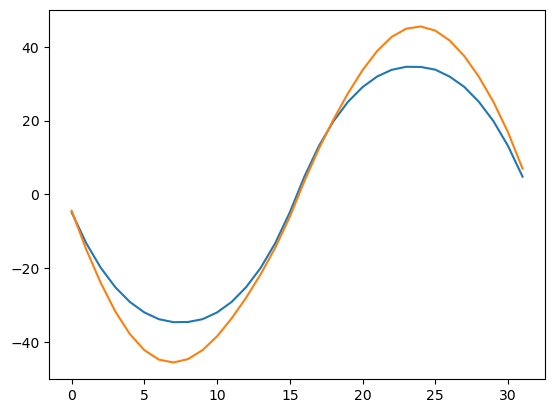

In [9]:
f0 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000000.h5")

f1 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000001.h5")

plt.plot(np.mean(f0['velocities'][:,:,:,0], axis=(0,2)))
plt.plot(np.mean(f1['velocities'][:,:,:,0], axis=(0,2)))

In [44]:
L=8
xmin=0.5
xmax=L-0.5
x=np.linspace(xmin, xmax, L)
df = pd.read_csv('velo_prof.csv', sep=' ', names = ['a', 'gamma', 'Ti']+list(x)+['eta'])
df.head()

,a,gamma,Ti,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,eta
0,2.363595,2.292231,2.0,2.594084,6.557909,8.994414,10.135281,10.134748,9.001657,6.549284,2.599917,0.382543
1,3.605563,3.323128,2.0,2.061908,5.280533,7.325198,8.280657,8.282837,7.327247,5.277019,2.056561,0.470316
2,3.605563,3.323128,2.0,2.061908,5.280533,7.325198,8.280657,8.282837,7.327247,5.277019,2.056561,0.470316
3,2.363595,2.292231,2.0,2.594084,6.557909,8.994414,10.135281,10.134748,9.001657,6.549284,2.599917,0.382543
4,2.361297,2.887183,2.0,2.275278,5.799336,8.030754,9.085522,9.089720,8.033861,5.807348,2.284465,0.428490


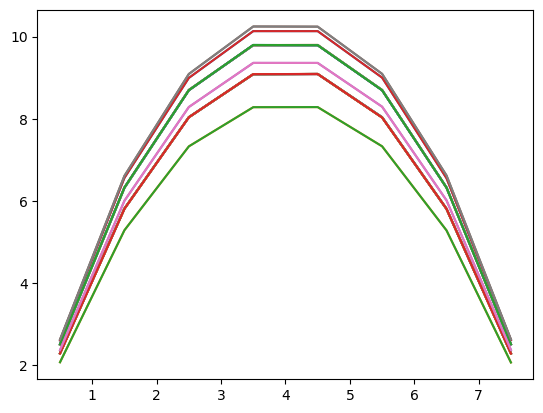

In [17]:
plt.plot(df[x].T);

In [18]:
L=8
h=L
Fx=0.5
rhow = 8.0

def quadratic_func(y, eta):
    return ((Fx*h)/(2*eta))*y*(1-y/h)

0.4284602106318199


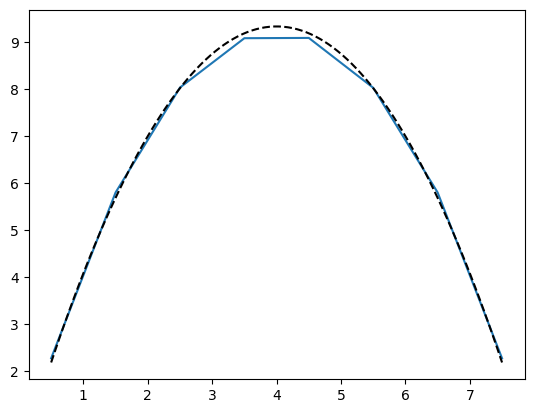

In [57]:
xmin=0.5
xmax=L-0.5

k=-5

x=np.linspace(xmin, xmax, L)

popt, pcov = curve_fit(quadratic_func, x, df[x].iloc[k])
eta=popt[0]
print(eta)

plt.plot(x, df[x].iloc[k])
u=np.linspace(xmin, xmax, 100)
plt.plot(u, quadratic_func(u, *popt), 'k--')

In [16]:
import json
with open('_korali_result_cmaes/gen00000016.json') as f:
  data = json.load(f)

len(data["Samples"])

12

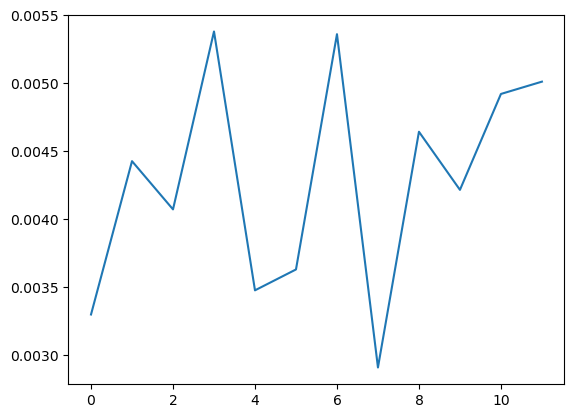

In [17]:
r=np.arange(0, 12)
plt.plot(r, [data["Samples"][k]["error_fit"] for k in r])

In [37]:
def kineticVisco(kBT, s, nd, rc, gamma, m):
    """
    Remember : s=2*power
    """
    A=(3*kBT*(s+1)*(s+2)*(s+3))/(16*np.pi*nd*(rc**3)*gamma)
    B=(16*np.pi*nd*(rc**3)*gamma)/(5*m*(s+1)*(s+2)*(s+3)*(s+4)*(s+5))
    return(A+B)

In [41]:
7.334702268378116e-06/6.251561989767416e-05

0.11732591439361216

In [40]:
kineticVisco(kBT=0.01, s=2, nd=3, rc=1, gamma=10, m=1)

0.12087338220994323

In [55]:
L=12
xmin=0.5
xmax=L-0.5
x=np.linspace(xmin, xmax, L)
df = pd.read_csv('model/velo_prof.csv', sep=' ', names = ['a', 'gamma', 'Ti','eta']+list(x))


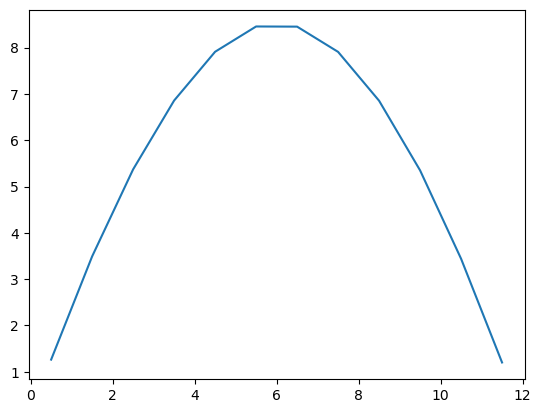

In [56]:
#plt.plot(x, y0)
plt.plot(x, df[x].values[0])

In [45]:
rho_s=3
kBT_s=0.01

rho_water = 997 # kg/m^3 
kb = 1.3805e-23 # S.I  
Ti = 298.15 # K

ul = 35e-9 # real/simu
um = rho_water*ul**3 / rho_s
ue = kb*(Ti+273.15) / kBT_s
ut = np.sqrt(um*ul**2/ue)

# kinematic viscosity is in kg . m^-1 . s^-1
u_eta=(um/(ul*ut) )

In [50]:
1/(ul**2/ut)

3840348.6714422344

In [46]:
1/u_eta

11555.713153788069

In [47]:
um

1.424879166666667e-20